In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
# Filename: MGS4701_Team4_Milestone1.ipynb
# Author: Jared Sheridan, Evan Kavanagh
# Created: 2024-12-16
# Version: 1.0
# Description: 
    Preprocessing of Dataset for MSRP Prediction Project
"""

In [1]:
print("MGS4701 Team 4")

MGS4701 Team 4


In [2]:
##Important Data Cleaning done prior to utilizing Python (on Excel)

In [3]:
#Created "Vehicle Age" column from "Year of Vehicle" column
#Encoded all categorical variables combining various categories
#Created "avg MPG" column by combining "city MPG" and "highway MPG"
#Log10 based MSRP to create more accurate results when conducting analysis

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("CarDatasetCSV.csv")
print(df.head())

  Make     Model  Car_Age  Fuel_Type_RegularUnleaded  Fuel_Type_Premium  \
0  BMW  1 Series       13                          0                  1   
1  BMW  1 Series       13                          0                  1   
2  BMW  1 Series       13                          0                  1   
3  BMW  1 Series       13                          0                  1   
4  BMW  1 Series       13                          0                  1   

   Fuel_Type_FlexFuel  Fuel_Type_Diesel  Fuel_Type_NaturalGas  \
0                   0                 0                     0   
1                   0                 0                     0   
2                   0                 0                     0   
3                   0                 0                     0   
4                   0                 0                     0   

   Fuel_Type_Electric  Engine_HP  ...  VehicleStyle_RegularCabPickup  \
0                   0      335.0  ...                              0   
1             

In [6]:
df.isnull().sum()

Make                                 0
Model                                0
Car_Age                              0
Fuel_Type_RegularUnleaded            0
Fuel_Type_Premium                    0
Fuel_Type_FlexFuel                   0
Fuel_Type_Diesel                     0
Fuel_Type_NaturalGas                 0
Fuel_Type_Electric                   0
Engine_HP                           69
Engine_Cylinders                    30
Transmission_Automatic               0
Transmission_Manual                  0
Transmission_AutomatedManual         0
Transmission_DirectDrive             0
Transmission_Unknown                 0
Drive_RearWheel                      0
Drive_FrontWheel                     0
Drive_AllWheel                       0
Drive_FourWheel                      0
Number_of_Doors                      0
Market_Category_FactoryTuner         0
Market_Category_Luxury               0
Market_Category_Performance          0
Market_Category_High-Performance     0
Market_Category_Exotic   

In [7]:
df['Engine_HP'].fillna(df['Engine_HP'].mode()[0], inplace=True)

In [8]:
df['Engine_Cylinders'].fillna(df['Engine_Cylinders'].mean(), inplace=True)

In [9]:
# Reverse log base 10 transformation on the MSRP column
#df['MSRP'] = 10 ** df['MSRP']

In [10]:
df.head()

,Make,Model,Car_Age,Fuel_Type_RegularUnleaded,Fuel_Type_Premium,Fuel_Type_FlexFuel,Fuel_Type_Diesel,Fuel_Type_NaturalGas,Fuel_Type_Electric,Engine_HP,...,VehicleStyle_RegularCabPickup,VehicleStyle_ExtendedCabPickup,VehicleStyle_2drSUV,VehicleStyle_CargoVan,VehicleStyle_ConvertibleSUV,VehicleStyle_PassengerVan,average_MPG,Popularity,MSRP,MSRP_UnLogged
0,BMW,1 Series,13,0,1,0,0,0,0,335.0,...,0,0,0,0,0,0,22.5,3916,4.6640,46135
1,BMW,1 Series,13,0,1,0,0,0,0,300.0,...,0,0,0,0,0,0,23.5,3916,4.6091,40650
2,BMW,1 Series,13,0,1,0,0,0,0,300.0,...,0,0,0,0,0,0,24.0,3916,4.5605,36350
3,BMW,1 Series,13,0,1,0,0,0,0,230.0,...,0,0,0,0,0,0,23.0,3916,4.4691,29450
4,BMW,1 Series,13,0,1,0,0,0,0,230.0,...,0,0,0,0,0,0,23.0,3916,4.5378,34500


In [11]:
df.isnull().sum()

Make                                0
Model                               0
Car_Age                             0
Fuel_Type_RegularUnleaded           0
Fuel_Type_Premium                   0
Fuel_Type_FlexFuel                  0
Fuel_Type_Diesel                    0
Fuel_Type_NaturalGas                0
Fuel_Type_Electric                  0
Engine_HP                           0
Engine_Cylinders                    0
Transmission_Automatic              0
Transmission_Manual                 0
Transmission_AutomatedManual        0
Transmission_DirectDrive            0
Transmission_Unknown                0
Drive_RearWheel                     0
Drive_FrontWheel                    0
Drive_AllWheel                      0
Drive_FourWheel                     0
Number_of_Doors                     0
Market_Category_FactoryTuner        0
Market_Category_Luxury              0
Market_Category_Performance         0
Market_Category_High-Performance    0
Market_Category_Exotic              0
Market_Categ

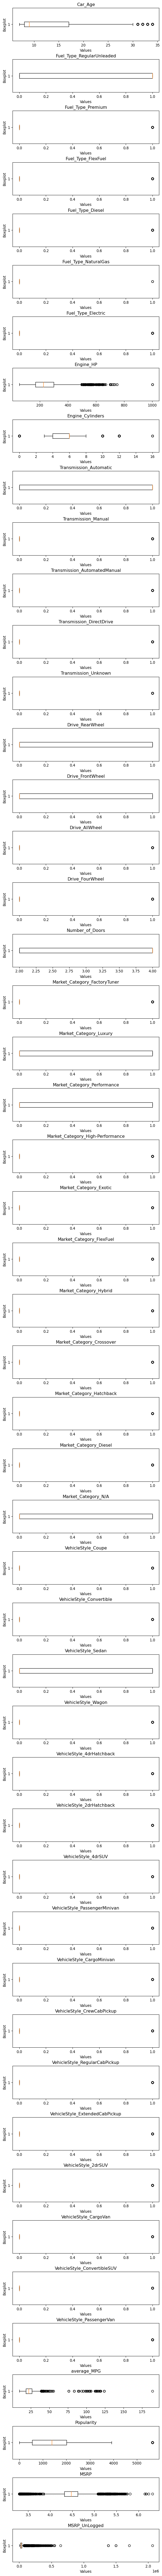

In [12]:
#Numeric data for boxplots
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]

#Boxplots for each numeric column
fig, axs = plt.subplots(len(numeric_columns), 1, dpi=95, figsize=(7, len(numeric_columns)*2))
fig.tight_layout(pad=3)  # Adjust spacing

#Loop through numeric columns to plot boxplots
for i, col in enumerate(numeric_columns):
    axs[i].boxplot(numeric_data[col].dropna(), vert=False)
    axs[i].set_title(col)
    axs[i].set_xlabel("Values")
    axs[i].set_ylabel("Boxplot")

plt.show()

In [13]:
#Initialize Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Copy the original DataFrame
df_normalized = df.copy()

#Exclude "MSRP" and "MSRP_UnLogged" from numeric columns
numeric_columns_to_scale = [col for col in numeric_columns if col not in ['MSRP', 'MSRP_UnLogged']]

#Apply scaler to the selected numeric columns
df_normalized[numeric_columns_to_scale] = scaler.fit_transform(df[numeric_columns_to_scale])

#Display the normalized DataFrame
df_normalized.head()


,Make,Model,Car_Age,Fuel_Type_RegularUnleaded,Fuel_Type_Premium,Fuel_Type_FlexFuel,Fuel_Type_Diesel,Fuel_Type_NaturalGas,Fuel_Type_Electric,Engine_HP,...,VehicleStyle_RegularCabPickup,VehicleStyle_ExtendedCabPickup,VehicleStyle_2drSUV,VehicleStyle_CargoVan,VehicleStyle_ConvertibleSUV,VehicleStyle_PassengerVan,average_MPG,Popularity,MSRP,MSRP_UnLogged
0,BMW,1 Series,0.222222,0.0,1.0,0.0,0.0,0.0,0.0,0.295983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.072423,0.692131,4.6640,46135
1,BMW,1 Series,0.222222,0.0,1.0,0.0,0.0,0.0,0.0,0.258985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.077994,0.692131,4.6091,40650
2,BMW,1 Series,0.222222,0.0,1.0,0.0,0.0,0.0,0.0,0.258985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080780,0.692131,4.5605,36350
3,BMW,1 Series,0.222222,0.0,1.0,0.0,0.0,0.0,0.0,0.184989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.075209,0.692131,4.4691,29450
4,BMW,1 Series,0.222222,0.0,1.0,0.0,0.0,0.0,0.0,0.184989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.075209,0.692131,4.5378,34500


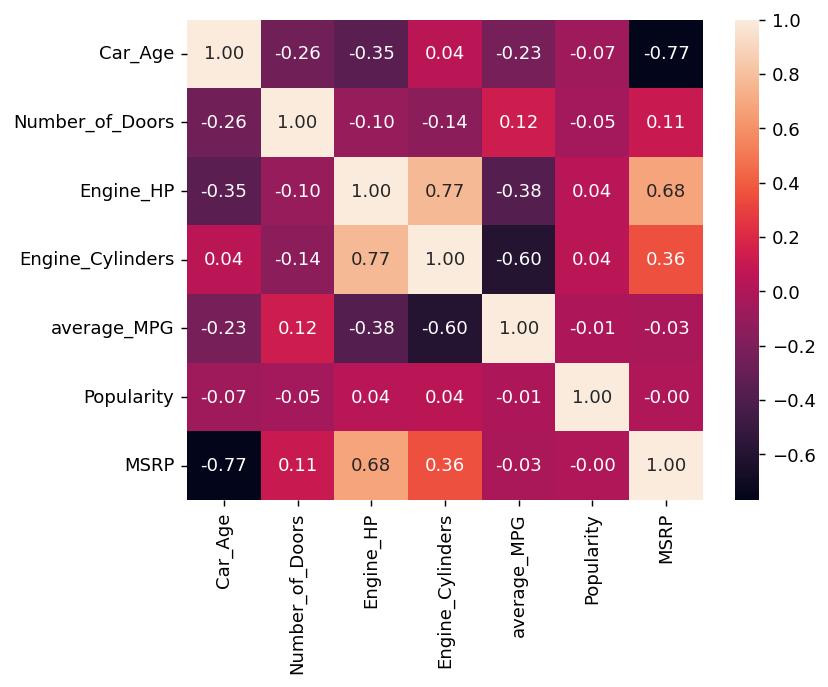

In [14]:
#Subset the DataFrame and only use numeric variables
selected_columns = ["Car_Age", "Number_of_Doors", "Engine_HP", "Engine_Cylinders", "average_MPG", "Popularity", "MSRP"]
corr = df_normalized[selected_columns].corr()

#Plot the heatmap
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [15]:
df_normalized.to_csv("CarDataset_Normalized.csv", index=False)